In [1]:
import numpy as np
import os
import re
import matplotlib.pyplot as plt
from tqdm import tqdm
np.random.seed(2022)

In [4]:
path = "/ocean/projects/atm200007p/jlin96/nnIngredientFactory/cleanDataFolder/"
subFolders = !ls ../cleanDataFolder/
files = [path + x + "/" + re.sub("training","nnInput",x) + ".npy" for x in subFolders]

In [5]:
files

['/ocean/projects/atm200007p/jlin96/nnIngredientFactory/cleanDataFolder/training_01_09/nnInput_01_09.npy',
 '/ocean/projects/atm200007p/jlin96/nnIngredientFactory/cleanDataFolder/training_01_17/nnInput_01_17.npy',
 '/ocean/projects/atm200007p/jlin96/nnIngredientFactory/cleanDataFolder/training_01_25/nnInput_01_25.npy',
 '/ocean/projects/atm200007p/jlin96/nnIngredientFactory/cleanDataFolder/training_02_02/nnInput_02_02.npy',
 '/ocean/projects/atm200007p/jlin96/nnIngredientFactory/cleanDataFolder/training_02_10/nnInput_02_10.npy',
 '/ocean/projects/atm200007p/jlin96/nnIngredientFactory/cleanDataFolder/training_02_18/nnInput_02_18.npy',
 '/ocean/projects/atm200007p/jlin96/nnIngredientFactory/cleanDataFolder/training_02_26/nnInput_02_26.npy',
 '/ocean/projects/atm200007p/jlin96/nnIngredientFactory/cleanDataFolder/training_03_06/nnInput_03_06.npy',
 '/ocean/projects/atm200007p/jlin96/nnIngredientFactory/cleanDataFolder/training_03_14/nnInput_03_14.npy',
 '/ocean/projects/atm200007p/jlin96/n

In [6]:
def sampleIndices(size, spacing, fixed = True):
    numIndices = np.round(size/spacing)
    if fixed:
        indices = np.array([int(x) for x in np.round(np.linspace(1,size,int(numIndices)))])-1
    else:
        indices = list(range(size))
        np.random.shuffle(indices)
        indices = indices[0:int(numIndices)]
    return indices

def shrinkArray(nnData):
    nnData = nnData[:,:,:,sampleIndices(nnData.shape[3], 5, True)]
    nnData = nnData.ravel(order = 'F').reshape(184,-1,order = 'F')
    return nnData

def splitArray(nnData):
    nnInputSpecific = nnData[0:64,:]
    nnInputRelative = np.concatenate((nnData[:30,:],nnData[64:94,:], nnData[60:64,:]))
    nnTarget = nnData[124:,:]
    nnSpecific = np.concatenate((nnInputSpecific, nnTarget))
    nnRelative = np.concatenate((nnInputRelative, nnTarget))
    arrays = [nnSpecific, nnRelative]
    return arrays

def reorderArray(nnData):
    canonical = np.concatenate([nnData[0:30,:], \
                                nnData[30:60,:], \
                                nnData[62:63,:], \
                                nnData[63:64,:], \
                                nnData[61:62,:], \
                                nnData[60:61,:], \
                                nnData[64:94,:], \
                                nnData[94:124,:]], axis = 0)
    return canonical

In [7]:
datasets = []
for arr in tqdm(files):
    with open(arr, 'rb') as f:
        nnData = np.load(f)
        nnData = nnData[:,:-1,:,:]
    datasets.append(shrinkArray(nnData))
    del nnData
combinedData = np.concatenate(datasets, axis = 1)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 45/45 [26:45<00:00, 35.68s/it]


In [9]:
arrs = splitArray(combinedData)

In [10]:
arrs[0].shape

(124, 41099136)

In [11]:
arrs[1].shape

(124, 41099136)

In [12]:
rearrangedSpecific = reorderArray(arrs[0])
rearrangedRelative = reorderArray(arrs[1])

In [13]:
rearrangedSpecific.shape

(124, 41099136)

In [14]:
rearrangedRelative.shape

(124, 41099136)

In [15]:
averagesSpecific = np.mean(rearrangedSpecific, axis = 1)

In [16]:
averagesRelative = np.mean(rearrangedRelative, axis = 1)

In [17]:
averagesSpecific.shape

(124,)

In [18]:
averagesRelative.shape

(124,)

In [19]:
averagedCombined = np.mean(combinedData, axis = 1)

In [20]:
averagedCombined.shape

(184,)

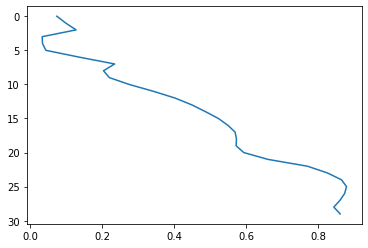

In [21]:
plt.plot(averagedCombined[64:94], range(30))
plt.gca().invert_yaxis()

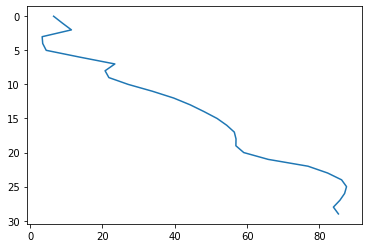

In [22]:
plt.plot(averagedCombined[94:124], range(30))
plt.gca().invert_yaxis()

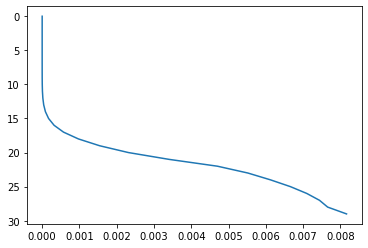

In [23]:
plt.plot(averagesSpecific[30:60], range(30))
plt.gca().invert_yaxis()

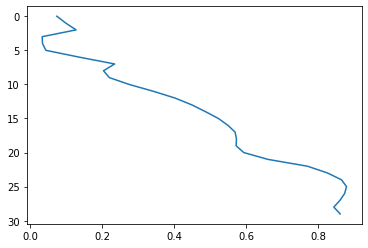

In [24]:
plt.plot(averagesRelative[30:60], range(30))
plt.gca().invert_yaxis()

In [25]:
path = "/ocean/projects/atm200007p/jlin96/nnIngredientFactory/preprocessing/"
with open(path + 'nnDataSpecific.npy', 'wb') as f:
    np.save(f, rearrangedSpecific)
with open(path + 'nnDataRelative.npy', 'wb') as f:
    np.save(f, rearrangedRelative)

In [26]:
print("finished")

finished
